In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
# Import train and test split\
from sklearn.model_selection import train_test_split

# Improt preprocessing module
from sklearn import preprocessing

# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import cross-validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Import metrics for model performance
from sklearn.metrics import mean_squared_error, r2_score

# Import module for storing arrays
import joblib

from sklearn.neighbors import KNeighborsClassifier

from scipy import stats as ss

import collections as co

# Specials.
import scipy.special as spec

from scipy.stats import multivariate_normal

***

# Section 3. SciPy.Stats Overview

<br>


## 3.1. What is SciPy?

<br>

Scipy is an opensource Python library used to manipulate and visualise data with a wide range of high level command.

SciPy is built on top of Numpy. Both are similar in that they are used for mathematical and numerical analysis.

Numpy contains array data and basic operations such as sorting and indexing.

Scipy consists of all the numerical code.

Scipy contains fully-featured versions of mathematical function.

***

## 3.2. SciPy.Stats Overview

<br>

Scipy.Stats is a module within the SciPy library that implements probability distributions. 

##### Reference: https://www.great-esf.eu/AstroStats13-Python/numpy/scipystats.html

In [2]:
df = pd.read_csv('Diet.csv')
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


***

### SciPy.stats - Probability Distributions and Statistics Functions

1. Continuous distributions

2. Multivariate distributions

3. Discrete distributions

4. Summary statistics

5. Frequency statistics

6. Correlation functions

7. Statistical tests

8. Quasi-Monte Carlo (scipy.stats.qmc)

There are a few function groups within SciPy.stats that will not be investigated in this project.

<br>

### 3.2.1. Continuous Distributions

Continuous distributions plot the possible values of a continuous random variable. A continuous random variable is a random variable with a range of possible values that is unacountable (https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/probability-distributions/supporting-topics/basics/continuous-and-discrete-probability-distributions/).

Take for example, the weight continous probability distribution of the weight of male adults. This is an unacountable random variable as it is not possible to retrieve the exact weight of every male adult.

Instead the distribution can be plotted as below:

<img src="https://support.minitab.com/en-us/minitab-express/1/distribution_plot_normal_weight_shade_middle.xml_Graph_cmd1o1.png" style="width: 650px;">

The plot above shows the distributions of adult male weight (in pounds) on the x-axis. The probability of the corresponding weight measurement in on the y-axis.

We can see from above that the mean is 180 pounds and the standard deviation is 10 pounds. There is a 13.5% chance that the men will weight between 160 and 170 pounds.

Scipy.stats has many differenct functions for continuous distributions, as there are many different kinds. FOr example, there is 'genpareto', which produces a generalised Pareto distribution and there is gamma, which produces a gamma continious random variable.

<br>

***

### 3.2.2. Multivariate distributions

SciPy.stats has built-in functions for multivariate distributions. This is for ditributions where there is more than one variable involved.

For example, the continuois normal distribution has a corresponding bivariate normal distribution where a random vector is said to be normally distributed if every linear combination of it's 'k' number of components has a univariate normal distribution (Wikipedia).

An example use of the bivariate normal distribution is plotted below in a seaborn scatterplot. In this example, we are using the Diet dataset, that will be used later in the chapter. 

We are extracting the Height and Age variables for use in this demonstration (although only height is normally distributed, not age).

c:\users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


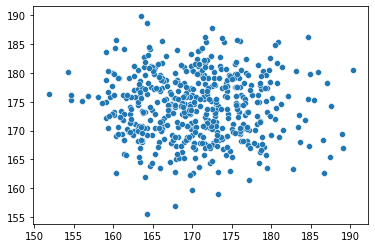

In [3]:
# https://towardsdatascience.com/exploring-normal-distribution-with-jupyter-notebook-3645ec2d83f8

mean = np.array(df['Height'])
cov = np.array(df['Age'])
x = multivariate_normal.rvs(mean, cov, 500)
sns.scatterplot(x[:,0],x[:,1])

***

### 3.2.3. Discrete Distributions

SciPy stats also has a means to calculate discrete distributions. This is a probability distribution that depicts discrete values of a finite amount.

The number of earthquakes per year, or accidents per driver are examples of the discrete distribution.

The Binomial distribution is a version of the discrete distribution.

<br>

***

### 3.2.4. Summary Statistics

SciPi.stats ofrers a number of summary statistics that provides a macro view of data.

An example is the stats.describe() method. This provides information such as the mean, std. deviation, minimum and maximum values.

A print out of the .describer() of the Diet dataset is below:

In [4]:
df.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,39.500000,39.153846,170.820513,72.525641,2.038462,68.680769
std,22.660538,9.815277,11.276621,8.723344,0.812920,8.924504
min,1.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,20.250000,32.250000,164.250000,66.000000,1.000000,61.850000
50%,39.500000,39.000000,169.500000,72.000000,2.000000,68.950000
75%,58.750000,46.750000,174.750000,78.000000,3.000000,73.825000
max,78.000000,60.000000,201.000000,103.000000,3.000000,103.000000


<br>

***

### 3.2.5. Frequency Statistics

Frequency statistics provide measurement that displays the number of observatios within a given scale, category or interval.

SciPy.stats offers functions such as the Cumulative Distribution Function, or cumfreq(). This returns a cumulative frequency histogram, using the histogram function. This will outline the probability that a random variable is less than or equal to an independent variable.

<br>

***

### 3.2.6. Correlation Function

SciPy.stats also offers methods to calculate the statistical correlation *between* random variables. These generall inestigate the spatial, or temporal distance between the variables.

The One-way Anova on the Diet dataset, will involve utilising a Correlation function called **f_oneway()**

In the plot below, we see the correlation between three time measurements/

<img src="https://qutip.org/docs/3.0.1/guide/scripts/correlation_ex1.hires.png">

<br>

***

### 3.2.7. Statistical Tests

These are a list of tests including t-tests, chisquare tests and Kologorov-Smirov tests, that are used to check the robustness of data judgements.

A t-test will be conducted below, on the Diet feature in the Diet dataset, in order to satisfy the Assumption of Normality. The function used in Section 4 below, is the .ttest_ind() where the independent and dependent variables (diet and BMI_WightLoss) are passed in.

In the case of the t-test used, the intention is to produce a p-value that can Reject the Null Hypothesis (H0), such that neither a type I or Type II error is made.

This relationship between the outcome of the t-test and the H0 being rejected is illustrated below:

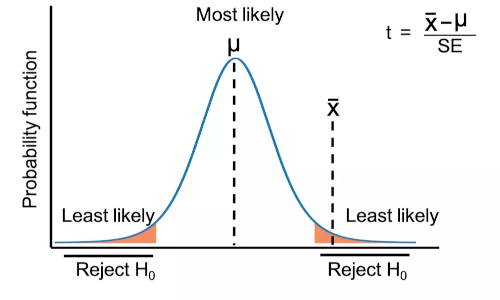

SciPy.stats needs to be able to provide the classic statistical tools for measuring the worthiness of data samples and datasets - these are found in this section.

<br>

***

### 3.2.8. Quasi-Monte Carlo (scipy.stats.qmc)

SciPy.stats provides a means for implementing an integration method on data known as the Quasi-Monte Carlo Method. 

This is in contrast to the regular Monte Carlo method, which is another integration method, but one that is used on pseudorandomly generated numbers.

The idea is integrate the approximate the integral of the function. 

<br>

***

# Section 4: A On-way Anova of the Diet Dataset

<br>

#### Reference: https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

In [8]:
pd.set_option('display.max_rows', 1000)

## 4.1 Dataset Preparation

### Import Dataset

In [9]:
df = pd.read_csv('Diet.csv')


In [10]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5


### Create 'BMI_change' Column

In [11]:
#BMI_change_df = df

In [12]:
df['BMI_start'] = df["pre.weight"] / (df["Height"] / 100)**2
df["BMI_end"] = df["weight6weeks"] / (df["Height"] / 100)**2
df["BMI_change"] = df['BMI_start'] - df["BMI_end"]

In [13]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,BMI_start,BMI_end,BMI_change
0,25,NaN,41,171,60,2,60.0,20.519134,20.519134,0.000000
1,26,NaN,32,174,103,2,103.0,34.020346,34.020346,0.000000
2,1,0,22,159,58,1,54.2,22.942130,21.439025,1.503105
3,2,0,46,192,60,1,54.0,16.276042,14.648438,1.627604
4,3,0,55,170,64,1,63.3,22.145329,21.903114,0.242215
5,4,0,33,171,64,1,61.1,21.887076,20.895318,0.991758
6,5,0,50,170,65,1,62.2,22.491349,21.522491,0.968858
7,6,0,50,201,66,1,64.0,16.336229,15.841192,0.495037
8,7,0,37,174,67,1,65.0,22.129740,21.469150,0.660589
9,8,0,28,176,69,1,60.5,22.275310,19.531250,2.744060


In [14]:
#Run once:
df['Diet'] = df['Diet'] - 1

In [15]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,BMI_start,BMI_end,BMI_change
0,25,NaN,41,171,60,1,60.0,20.519134,20.519134,0.000000
1,26,NaN,32,174,103,1,103.0,34.020346,34.020346,0.000000
2,1,0,22,159,58,0,54.2,22.942130,21.439025,1.503105
3,2,0,46,192,60,0,54.0,16.276042,14.648438,1.627604
4,3,0,55,170,64,0,63.3,22.145329,21.903114,0.242215
5,4,0,33,171,64,0,61.1,21.887076,20.895318,0.991758
6,5,0,50,170,65,0,62.2,22.491349,21.522491,0.968858
7,6,0,50,201,66,0,64.0,16.336229,15.841192,0.495037
8,7,0,37,174,67,0,65.0,22.129740,21.469150,0.660589
9,8,0,28,176,69,0,60.5,22.275310,19.531250,2.744060


***

## 4.2. Satisfying 6 Assumptions

Before a One-Way Anova on the Diet dataset can be completed, it is first necessary to ensure that the dataset is appropriate for a One-way Anova.

This is done by satisying a specified list of assumptions that will allow for a dataset that can be tested in this way.

### Assumption 1: Dependent Variable

#### Dependent: Weightost

In [16]:
BMI_change = df['BMI_change']

### Assumption 2: Independent Variable

#### 1: Diet

In [17]:
Diet = df['Diet']

#### 2: gender

In [18]:
gender = df['gender']

### Assumption 4: Outliers

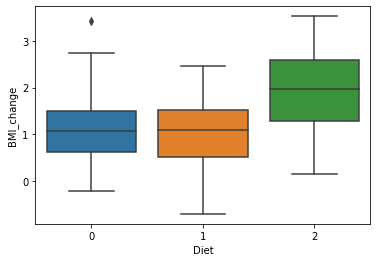

In [19]:
sns.boxplot(x=Diet, y=BMI_change)

In [20]:
BMI_change.describe()

count    78.000000
mean      1.350125
std       0.934202
min      -0.693619
25%       0.681503
50%       1.271620
75%       1.986516
max       3.520950
Name: BMI_change, dtype: float64

In [21]:
diet_1 = df[df["Diet"] == 1]["BMI_change"].to_list()
diet_2 = df[df["Diet"] == 2]["BMI_change"].to_list()
diet_3 = df[df["Diet"] == 3]["BMI_change"].to_list()

In [22]:
mean = df.BMI_change.mean()
mean

1.3501245872689778

### Assumption 5: Normality

In [23]:
from seaborn import displot

c:\users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


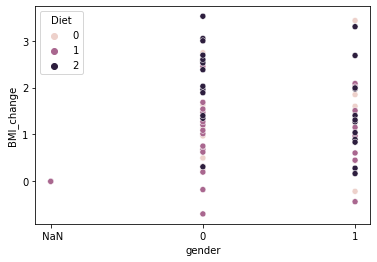

In [24]:
sns.scatterplot(df['gender'], BMI_change, hue=df['Diet'])

c:\users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

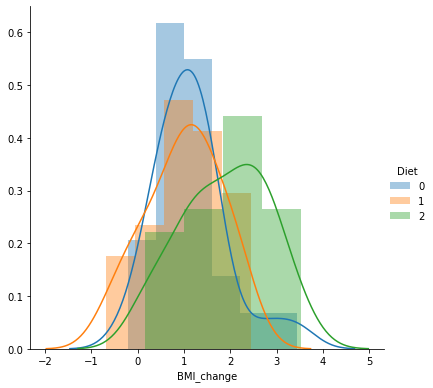

In [25]:
sns.FacetGrid(df,hue='Diet',height=5.5).map(sns.distplot,'BMI_change', kde=True).add_legend()

In [26]:
diet_one = BMI_change[Diet==0]
diet_two = BMI_change[Diet==1]
diet_three = BMI_change[Diet==2]

### Run Shapiro Wilks Test

In [27]:
ss.shapiro(diet_one)

ShapiroResult(statistic=0.9227969646453857, pvalue=0.06736458837985992)

In [28]:
ss.shapiro(diet_two)

ShapiroResult(statistic=0.9763475060462952, pvalue=0.7722797989845276)

In [29]:
ss.shapiro(diet_three)

ShapiroResult(statistic=0.9632238149642944, pvalue=0.43632328510284424)

#### All 3 distributions for the diets in terms of the dependent variable 'BMI_change', have a p-value greater than 0.05. As such, the evidence suggests that all 3 groups are normally distributed

### Assumption 6: Homogeneity of Variances

### Levene's Test for Homogeneity - using Levene() from Scipy-stats

In [30]:
ss.levene(
    BMI_change[Diet==0],
    BMI_change[Diet==1],
    BMI_change[Diet==2]
)

LeveneResult(statistic=1.0043048620443853, pvalue=0.37117119715835095)

### When studying the homogeneity of 'BMI_change' amongst the three categories of Diets above are showing a p-value greater than 0.05.

### Infact, it is much greater at *0.53*.

***

# 4.3. One-way Anova

<br>

In [31]:
ss.f_oneway(
    BMI_change[Diet==0],
    BMI_change[Diet==1],
    BMI_change[Diet==2]
    )

F_onewayResult(statistic=8.344341031617384, pvalue=0.0005345120426406237)

### As we see above, the p-value of 0.003 (*lower than 0.05*) suggests that the mean-values for the three diets in the independent variable are different.

***

## Unequal Variances Welch Anova

<br>


In [32]:
def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = co.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = spec.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [33]:
# Perform the test.
welch_anova_np(
    BMI_change[Diet==0],
    BMI_change[Diet==1],
    BMI_change[Diet==2]
)

F_onewayResult(statistic=7.497471261642536, pvalue=0.0014240568918744995)

### The p-value obtained from this Anova test of different variances is 0.00445 - this is significantly below the threshold of 0.05.

### The conclusion here is that the mean-weight lost by people who tried out diets 1, 2 and 3 over 6 weeks, **are different.**